In [1]:
# importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
df.shape

(200, 4)

In [4]:
# seeing relationship between Sales and other variables
df.corrwith(df['Sales'])

,0
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


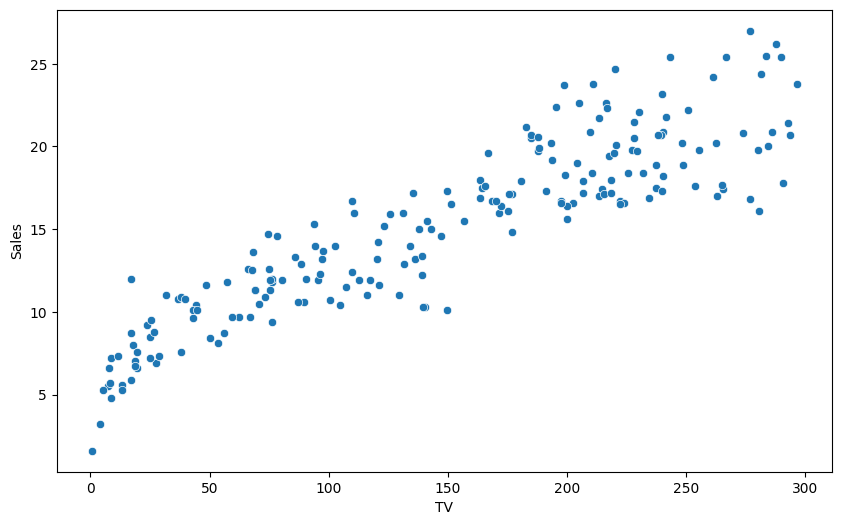

In [9]:
# Ploting a scatterplot to see relationship between TV and sales
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'TV', y = 'Sales')
plt.show()

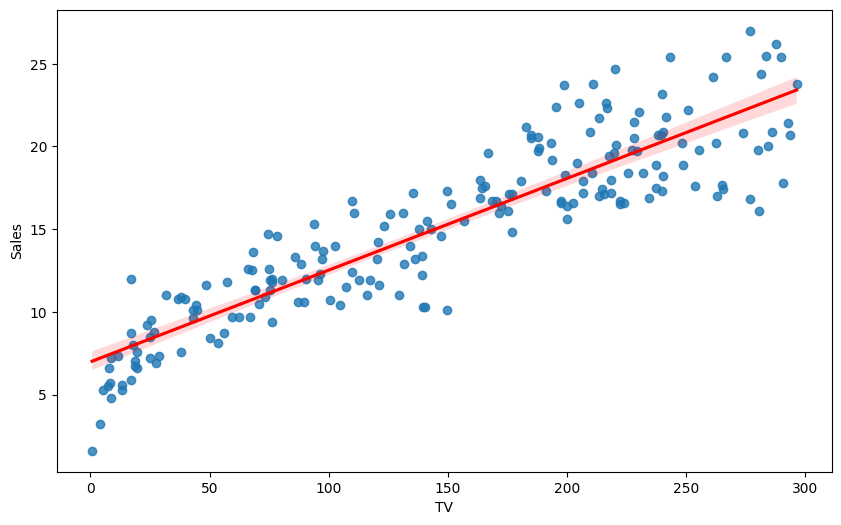

In [6]:
plt.figure (figsize = (10,6))
sns.regplot(data = df, x = 'TV', y = 'Sales', line_kws={'color':'red'})
plt.show()

In [13]:
# Spliting our data into test and train sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.1, random_state = 42)

In [19]:
# training our model
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
X_train = np.asanyarray(train_set[['TV']])
Y_train = np.asanyarray(train_set[['Sales']])
LR_model.fit(X_train, Y_train)

#finding k and b
k = LR_model.coef_[0][0]
b = LR_model.intercept_[0]
print(f"y = {k}X + {b}")

y = 0.05513263076693964X + 7.044916461655207


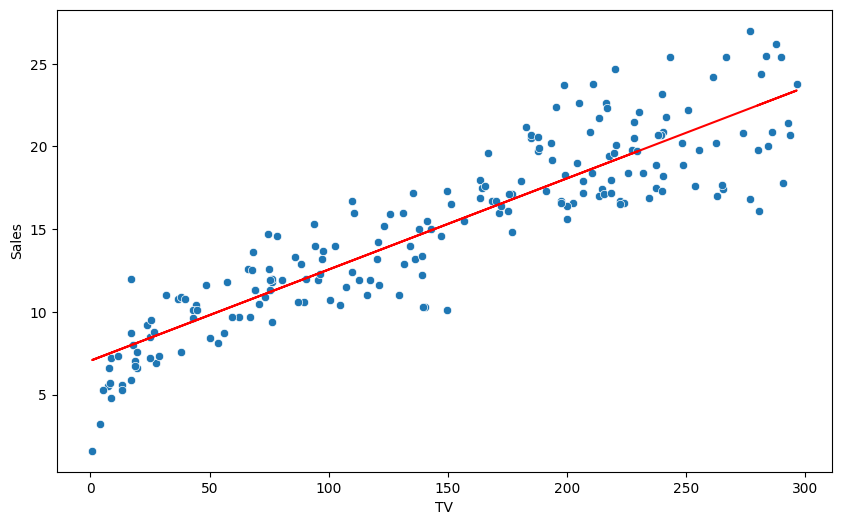

In [23]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'TV', y = 'Sales')
plt.plot(X_train, k*X_train + b, '-r')
plt.show()

In [24]:
# Evaluating our Model
X_test = np.asanyarray(test_set[['TV']])
Y_test = np.asanyarray(test_set[['Sales']])
Y_predict = LR_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(Y_test, Y_predict)
rmse = mean_squared_error(Y_test, Y_predict)
print(f"MAE = {mae}\nRMSE = {np.sqrt(rmse)}")

MAE = 2.037955356968121
RMSE = 2.5103822386472214
